In [2]:
import numpy as np
import matplotlib.pyplot as plt


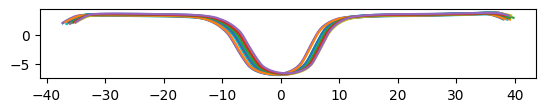

In [3]:
fig,ax=plt.subplots()

for i in range(25):
    points=np.loadtxt("profile_00"+str(i+1)+".dat")
    x=points[:,0]
    y=points[:,1]
    ax.plot(x,y)

ax.set_aspect('equal',"box")
plt.show()


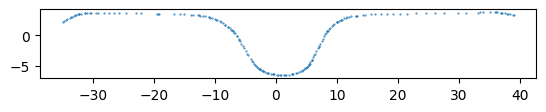

In [4]:
fig,ax=plt.subplots()

ax.scatter(x,y,s=0.2)
ax.set_aspect('equal',"box")
plt.show()

In [5]:
def interpolate_data(x,y,xrange=np.linspace(-32,32,500)):
    #xrange=np.linspace(-32,32,500)
    yinterp=np.interp(xrange,x,y)
    
    return yinterp

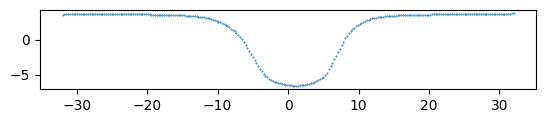

In [11]:
xrange=np.linspace(-32,32,250)
yi=interpolate_data(x,y,xrange)

fig,ax=plt.subplots()

ax.scatter(xrange,yi,s=0.2)
ax.set_aspect('equal',"box")
plt.show()

In [12]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift
 
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x # shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

In [13]:
fig,ax=plt.subplots()

points=np.loadtxt("profile_00"+str(1)+".dat")
x0=points[:,0]
y0=points[:,1]
        
xrange=np.linspace(-32,32,500)
y0i=interpolate_data(x0,y0,xrange)

#=====================================
shift=[]


for i in range(25):
    points=np.loadtxt("profile_00"+str(i+1)+".dat")
    x=points[:,0]
    y=points[:,1]
    
    yi=interpolate_data(x,y,xrange)
    
    shifti=compute_shift(y0i[50:450],yi[50:450])
    
    shift.append(shifti)
    
print(shift)


[0, -3, -3, -5, -5, -5, -3, -6, -1, -7, -12, -3, 2, -5, -13, -1, 0, -3, 3, -4, -5, -11, -2, 1, 4]


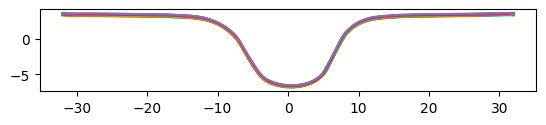

In [22]:
fig,ax=plt.subplots()

for i in range(25):
    points=np.loadtxt("profile_00"+str(i+1)+".dat")
    x=points[:,0]
    y=points[:,1]
    
    yi=interpolate_data(x,y,xrange)
    
    ax.plot(xrange,np.roll(yi,-shift[i]))
    

ax.set_aspect('equal',"box")
plt.show()





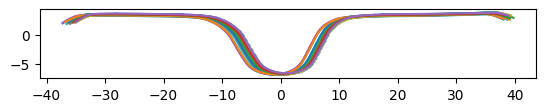

In [19]:
ax.set_aspect('equal',"box")
plt.show()



fig,ax=plt.subplots()




ax.scatter(xrange,yi,s=0.2)
ax.set_aspect('equal',"box")
#plt.show()

for i in range(25):
    points=np.loadtxt("profile_00"+str(i+1)+".dat")
    x=points[:,0]
    y=points[:,1]
    ax.plot(x,y)

plt.show()
#ax.set_aspect('equal',"box")
#plt.show()